In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

In [4]:
az.style.use("arviz-darkgrid")
plt.rcParams["figure.constrained_layout.use"] = False

In [5]:
try:
    df_all = pd.read_csv("C:/Users/ciaran.ofoghlu/OneDrive - Entain Group/Documents/football.csv")
except:
    df_all = pd.read_csv(pm.get_data("football.csv"))


In [6]:
df_all.head()

,home_team,away_team,home_goals,away_goals,year
0,Drogheda,Shamrock Rovers,1,2,2012
1,Derry City,Bohemians,1,0,2012
2,St. Patricks,Bray,1,0,2012
3,UC Dublin,Cork City,1,0,2012
4,Monaghan,Dundalk,0,0,2012


In [7]:
df_all["difference"] = np.abs(df_all["home_goals"] - df_all["away_goals"])

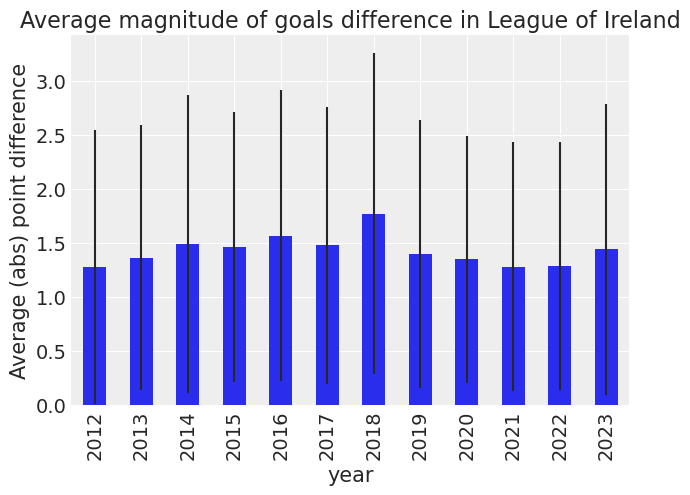

In [8]:
(
    df_all.groupby("year")["difference"]
    .mean()
    .plot(
        kind="bar",
        title="Average magnitude of goals difference in League of Ireland",
        yerr=df_all.groupby("year")["difference"].std(),
    )
    .set_ylabel("Average (abs) point difference")
);

In [9]:
df_all["difference_non_abs"] = df_all["home_goals"] - df_all["away_goals"]

In [10]:
df_all.pivot_table("difference_non_abs", "home_team", "year")

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
home_team,,,,,,,,,,,,
Athlone,NaN,NaN,-0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bohemians,-0.066667,-0.941176,0.000000,0.562500,0.250000,-0.352941,0.222222,0.555556,0.666667,0.888889,0.111111,0.888889
Bray,-1.000000,-0.666667,-0.875000,-0.176471,0.529412,0.062500,-1.055556,NaN,-1.000000,-1.000000,NaN,NaN
Cabinteely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
Cobh Ramblers,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cork City,0.687500,0.500000,1.058824,1.312500,2.058824,1.687500,1.666667,-0.388889,-0.444444,NaN,NaN,0.000000
Derry City,0.000000,0.647059,0.470588,-0.312500,0.500000,0.529412,0.000000,0.888889,0.444444,0.333333,0.833333,1.166667
Drogheda,0.437500,0.062500,-0.294118,-0.875000,1.000000,-1.125000,-0.500000,2.500000,NaN,0.277778,-0.055556,-0.055556
Dundalk,-0.588235,0.823529,2.250000,2.176471,0.937500,1.470588,2.166667,1.944444,-0.111111,0.111111,1.222222,0.888889


<Figure size 2000x800 with 0 Axes>

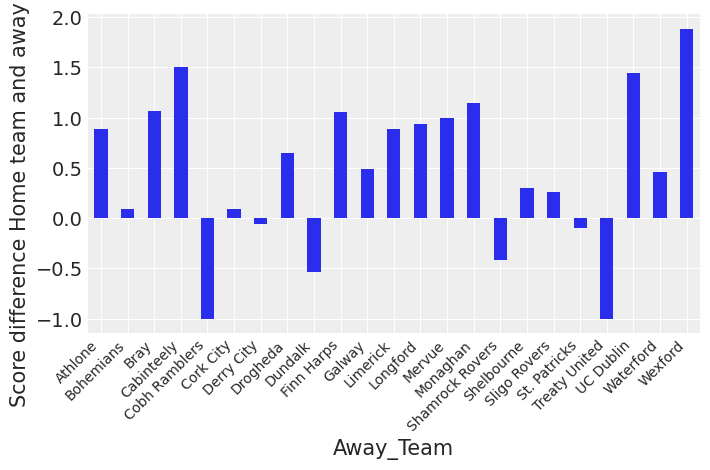

In [11]:
plt.figure(figsize=(20, 8)) 


ax = (
    df_all.pivot_table("difference_non_abs", "away_team")
    .rename_axis("Away_Team")
    .plot(kind="bar", rot=45, legend=False)  # Rotate labels by 45 degrees for better readability
)

ax.set_ylabel("Score difference Home team and away team")
plt.xticks(fontsize=10, ha='right')  # Align labels to the right to prevent overlapping

plt.tight_layout()

plt.show()

In [12]:
plt.rcParams["figure.constrained_layout.use"] = True
home_idx, teams = pd.factorize(df_all["home_team"], sort=True)
away_idx, _ = pd.factorize(df_all["away_team"], sort=True)
coords = {"team": teams}

In [13]:
print(df_all.columns)

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'year',
       'difference', 'difference_non_abs'],
      dtype='object')


In [14]:
with pm.Model(coords=coords) as model:
    # constant data
    home_team = pm.ConstantData("home_team", home_idx, dims="match")
    away_team = pm.ConstantData("away_team", away_idx, dims="match")

    # global model parameters
    home = pm.Normal("home", mu=0, sigma=1)
    sd_att = pm.HalfNormal("sd_att", sigma=2)
    sd_def = pm.HalfNormal("sd_def", sigma=2)
    intercept = pm.Normal("intercept", mu=3, sigma=1)

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sigma=sd_att, dims="team")
    defs_star = pm.Normal("defs_star", mu=0, sigma=sd_def, dims="team")

    atts = pm.Deterministic("atts", atts_star - pt.mean(atts_star), dims="team")
    defs = pm.Deterministic("defs", defs_star - pt.mean(defs_star), dims="team")
    home_theta = pt.exp(intercept + home + atts[home_idx] + defs[away_idx])
    away_theta = pt.exp(intercept + atts[away_idx] + defs[home_idx])

    # likelihood of observed data
    home_points = pm.Poisson(
        "home_points",
        mu=home_theta,
        observed=df_all["home_goals"],
        dims=("match"),
    )
    away_points = pm.Poisson(
        "away_points",
        mu=away_theta,
        observed=df_all["away_goals"],
        dims=("match"),
    )
    trace = pm.sample(1000, tune=1500, cores=4)

C:\Users\ciaran.ofoghlu\AppData\Local\miniconda3\envs\pymc-test\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [home, sd_att, sd_def, intercept, atts_star, defs_star]


C:\Users\ciaran.ofoghlu\AppData\Local\miniconda3\envs\pymc-test\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 120 seconds.


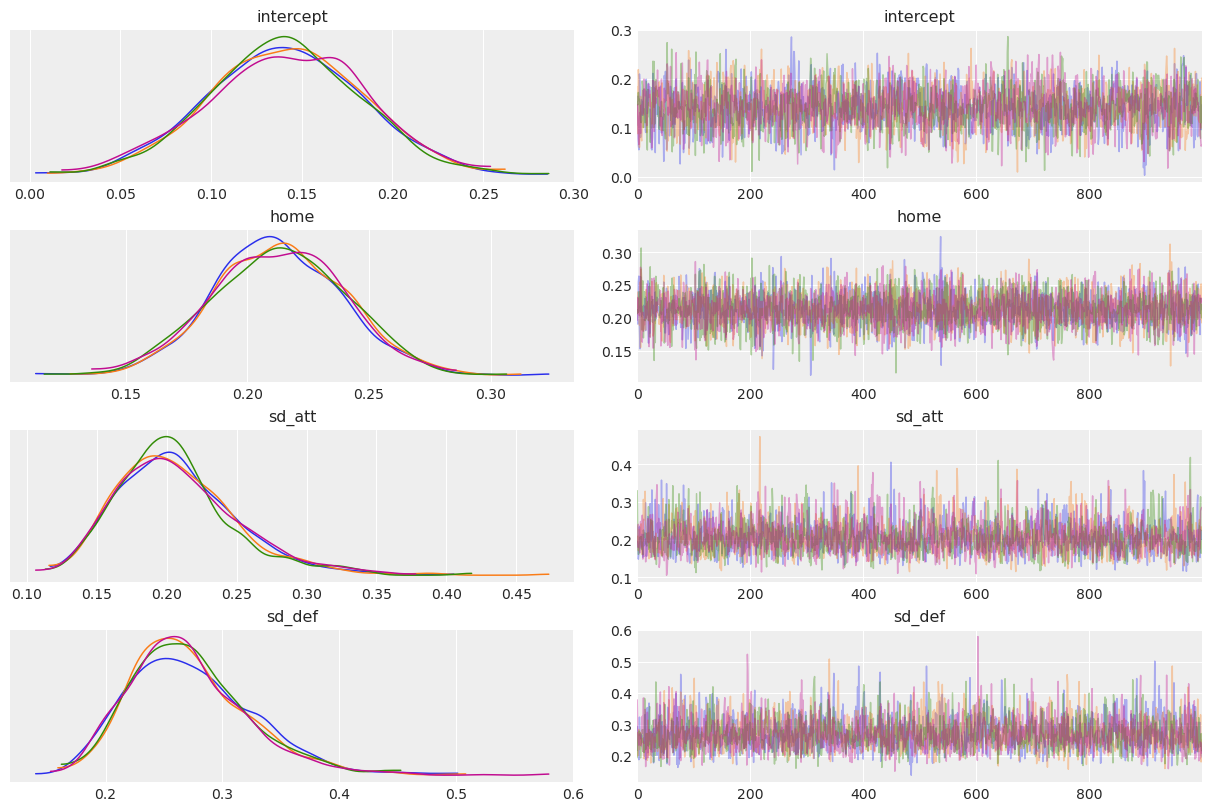

In [28]:
az.plot_trace(trace, var_names=["intercept", "home", "sd_att", "sd_def"], compact=False);

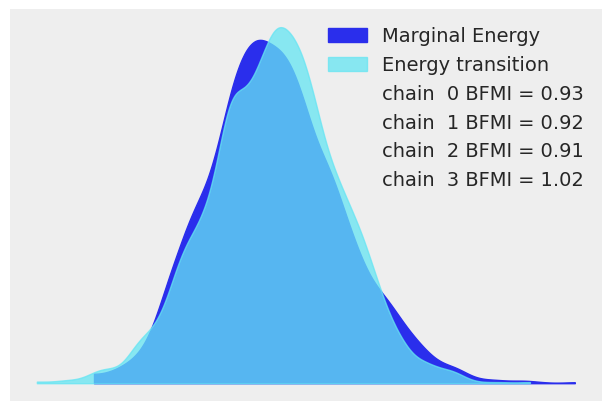

In [29]:
az.plot_energy(trace, figsize=(6, 4));

In [30]:
az.summary(trace, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
atts[Athlone],0.002,0.002,6235.0,3109.0,1.0
atts[Bohemians],0.001,0.001,4431.0,3245.0,1.0
atts[Bray],0.001,0.001,5550.0,3100.0,1.0
atts[Cabinteely],0.003,0.003,4522.0,2650.0,1.0
atts[Cobh Ramblers],0.003,0.003,5283.0,3041.0,1.0
...,...,...,...,...,...
defs_star[Wexford],0.002,0.002,3073.0,2966.0,1.0
home,0.000,0.000,5222.0,2985.0,1.0
intercept,0.001,0.001,2309.0,2780.0,1.0
sd_att,0.001,0.001,2343.0,2601.0,1.0


In [31]:
trace_hdi = az.hdi(trace)
trace_hdi["atts"]

<xarray.DataArray 'atts' (team: 23, hdi: 2)> Size: 368B
array([[-0.29631768,  0.15507851],
       [-0.03449905,  0.15350253],
       [-0.22856472,  0.00872613],
       [-0.4509139 ,  0.25382417],
       [-0.37025828,  0.3365167 ],
       [ 0.11629815,  0.30680589],
       [ 0.05824747,  0.24491162],
       [-0.11640049,  0.09966726],
       [ 0.30956037,  0.48511234],
       [-0.32063817, -0.07134694],
       [-0.09615184,  0.21268319],
       [-0.18276678,  0.08095729],
       [-0.38551382, -0.06243603],
       [-0.39631417,  0.30704709],
       [-0.45448096,  0.14828573],
       [ 0.20033278,  0.38531537],
       [-0.24688234,  0.02760286],
       [-0.04296454,  0.15114528],
       [ 0.10893345,  0.29184948],
       [-0.43032523,  0.27278546],
       [-0.34290036, -0.07559743],
       [-0.08935316,  0.18292333],
       [-0.36928833,  0.10790378]])
Coordinates:
  * team     (team) <U15 1kB 'Athlone' 'Bohemians' ... 'Waterford' 'Wexford'
  * hdi      (hdi) <U6 48B 'lower' 'higher'

In [32]:
trace.posterior["atts"].median(("chain", "draw"))

<xarray.DataArray 'atts' (team: 23)> Size: 184B
array([-0.06663399,  0.05673001, -0.10841937, -0.06591983, -0.03394443,
        0.21060189,  0.1584027 , -0.0081323 ,  0.39737761, -0.19538947,
        0.05604035, -0.04948738, -0.22214138, -0.0413027 , -0.1377144 ,
        0.29397167, -0.11276378,  0.04837742,  0.2053696 , -0.05425717,
       -0.21093014,  0.04566126, -0.13984343])
Coordinates:
  * team     (team) <U15 1kB 'Athlone' 'Bohemians' ... 'Waterford' 'Wexford'

C:\Users\ciaran.ofoghlu\AppData\Local\Temp\ipykernel_25320\1945515601.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


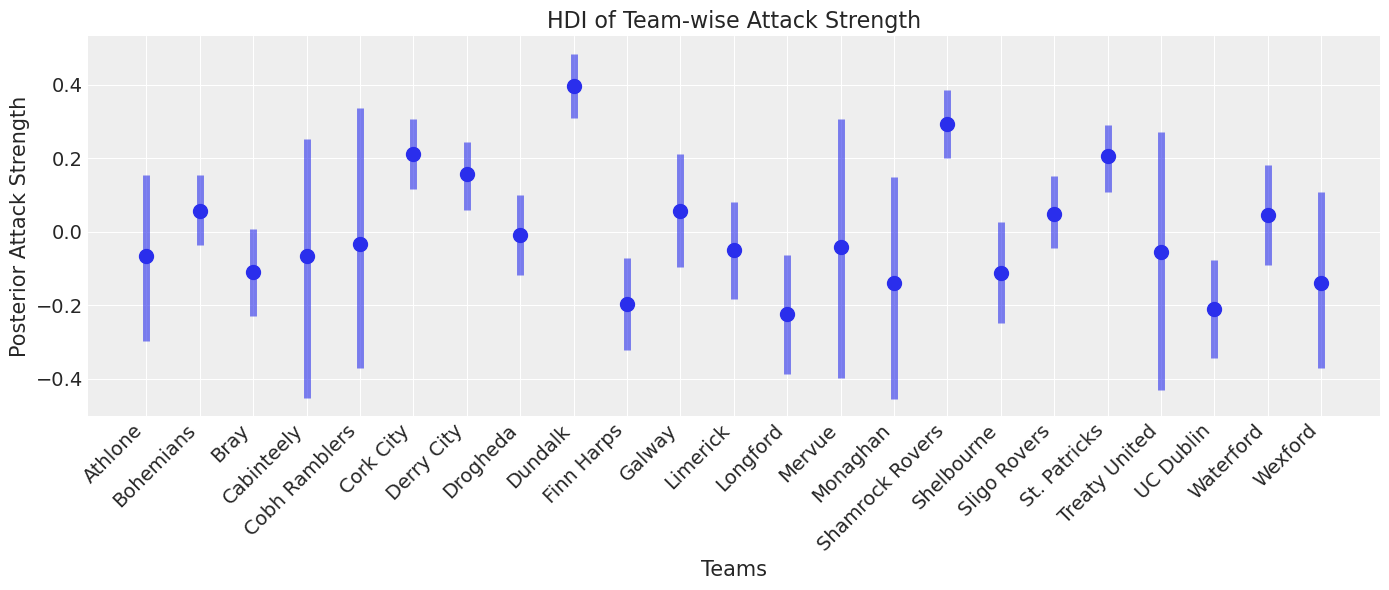

In [33]:
_, ax = plt.subplots(figsize=(14, 6))  # Increased figure size for better readability

# Plotting the scatter plot with error bars
ax.scatter(teams, trace.posterior["atts"].median(dim=("chain", "draw")), color="C0", alpha=1, s=100)
ax.vlines(
    teams,
    trace_hdi["atts"].sel({"hdi": "lower"}),
    trace_hdi["atts"].sel({"hdi": "higher"}),
    alpha=0.6,
    lw=5,
    color="C0",
)

# Set labels and title
ax.set_xlabel("Teams")
ax.set_ylabel("Posterior Attack Strength")
ax.set_title("HDI of Team-wise Attack Strength")

# Rotate x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate and align labels to the right

# Use tight layout for better spacing
plt.tight_layout()

plt.show()

In [34]:
# subclass arviz labeller to omit the variable name
class TeamLabeller(az.labels.BaseLabeller):
    def make_label_flat(self, var_name, sel, isel):
        sel_str = self.sel_to_str(sel, isel)
        return sel_str

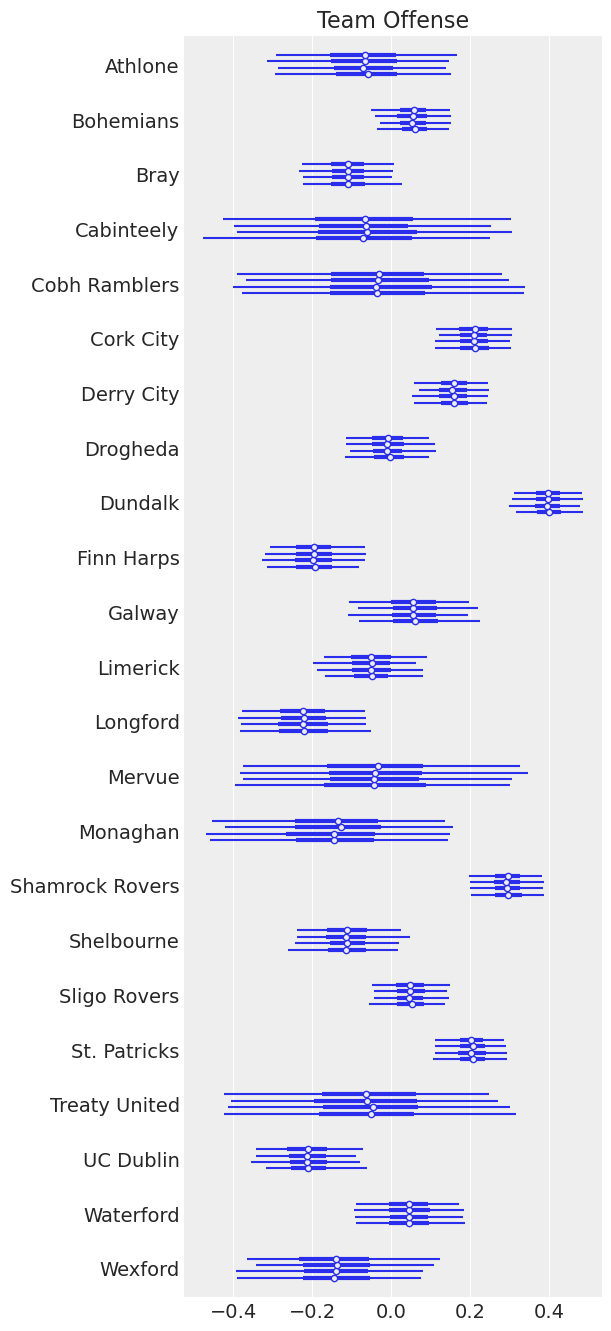

In [35]:
ax = az.plot_forest(trace, var_names=["atts"], labeller=TeamLabeller())
ax[0].set_title("Team Offense");

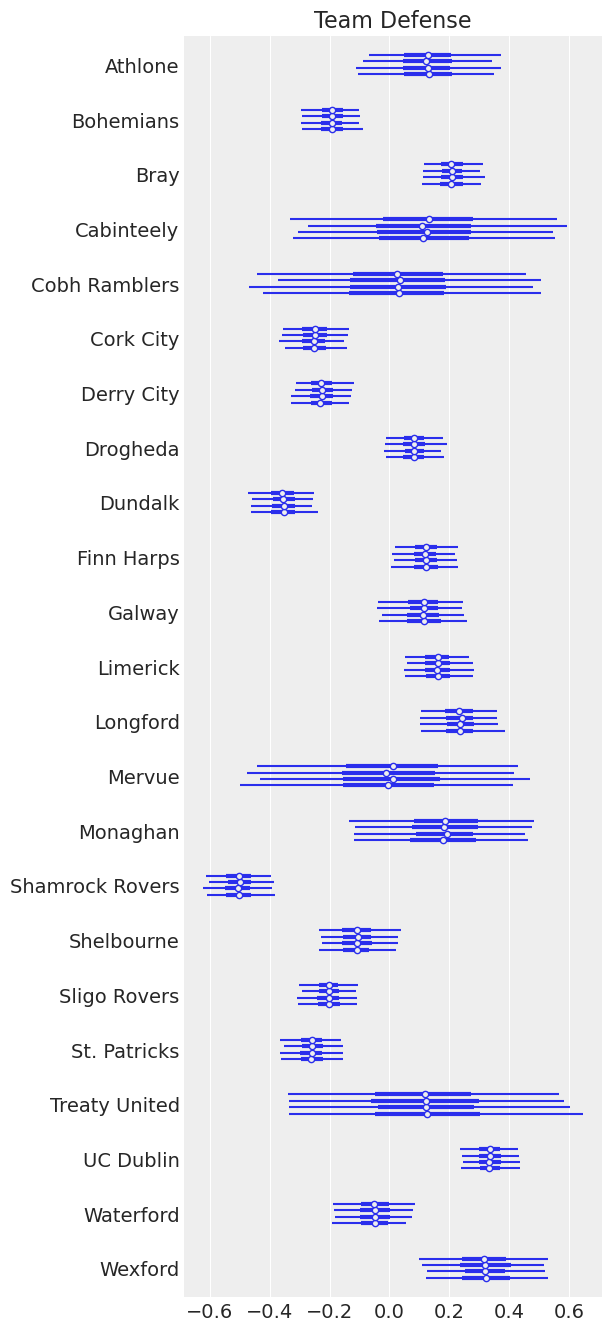

In [36]:
ax = az.plot_forest(trace, var_names=["defs"], labeller=TeamLabeller())
ax[0].set_title("Team Defense");

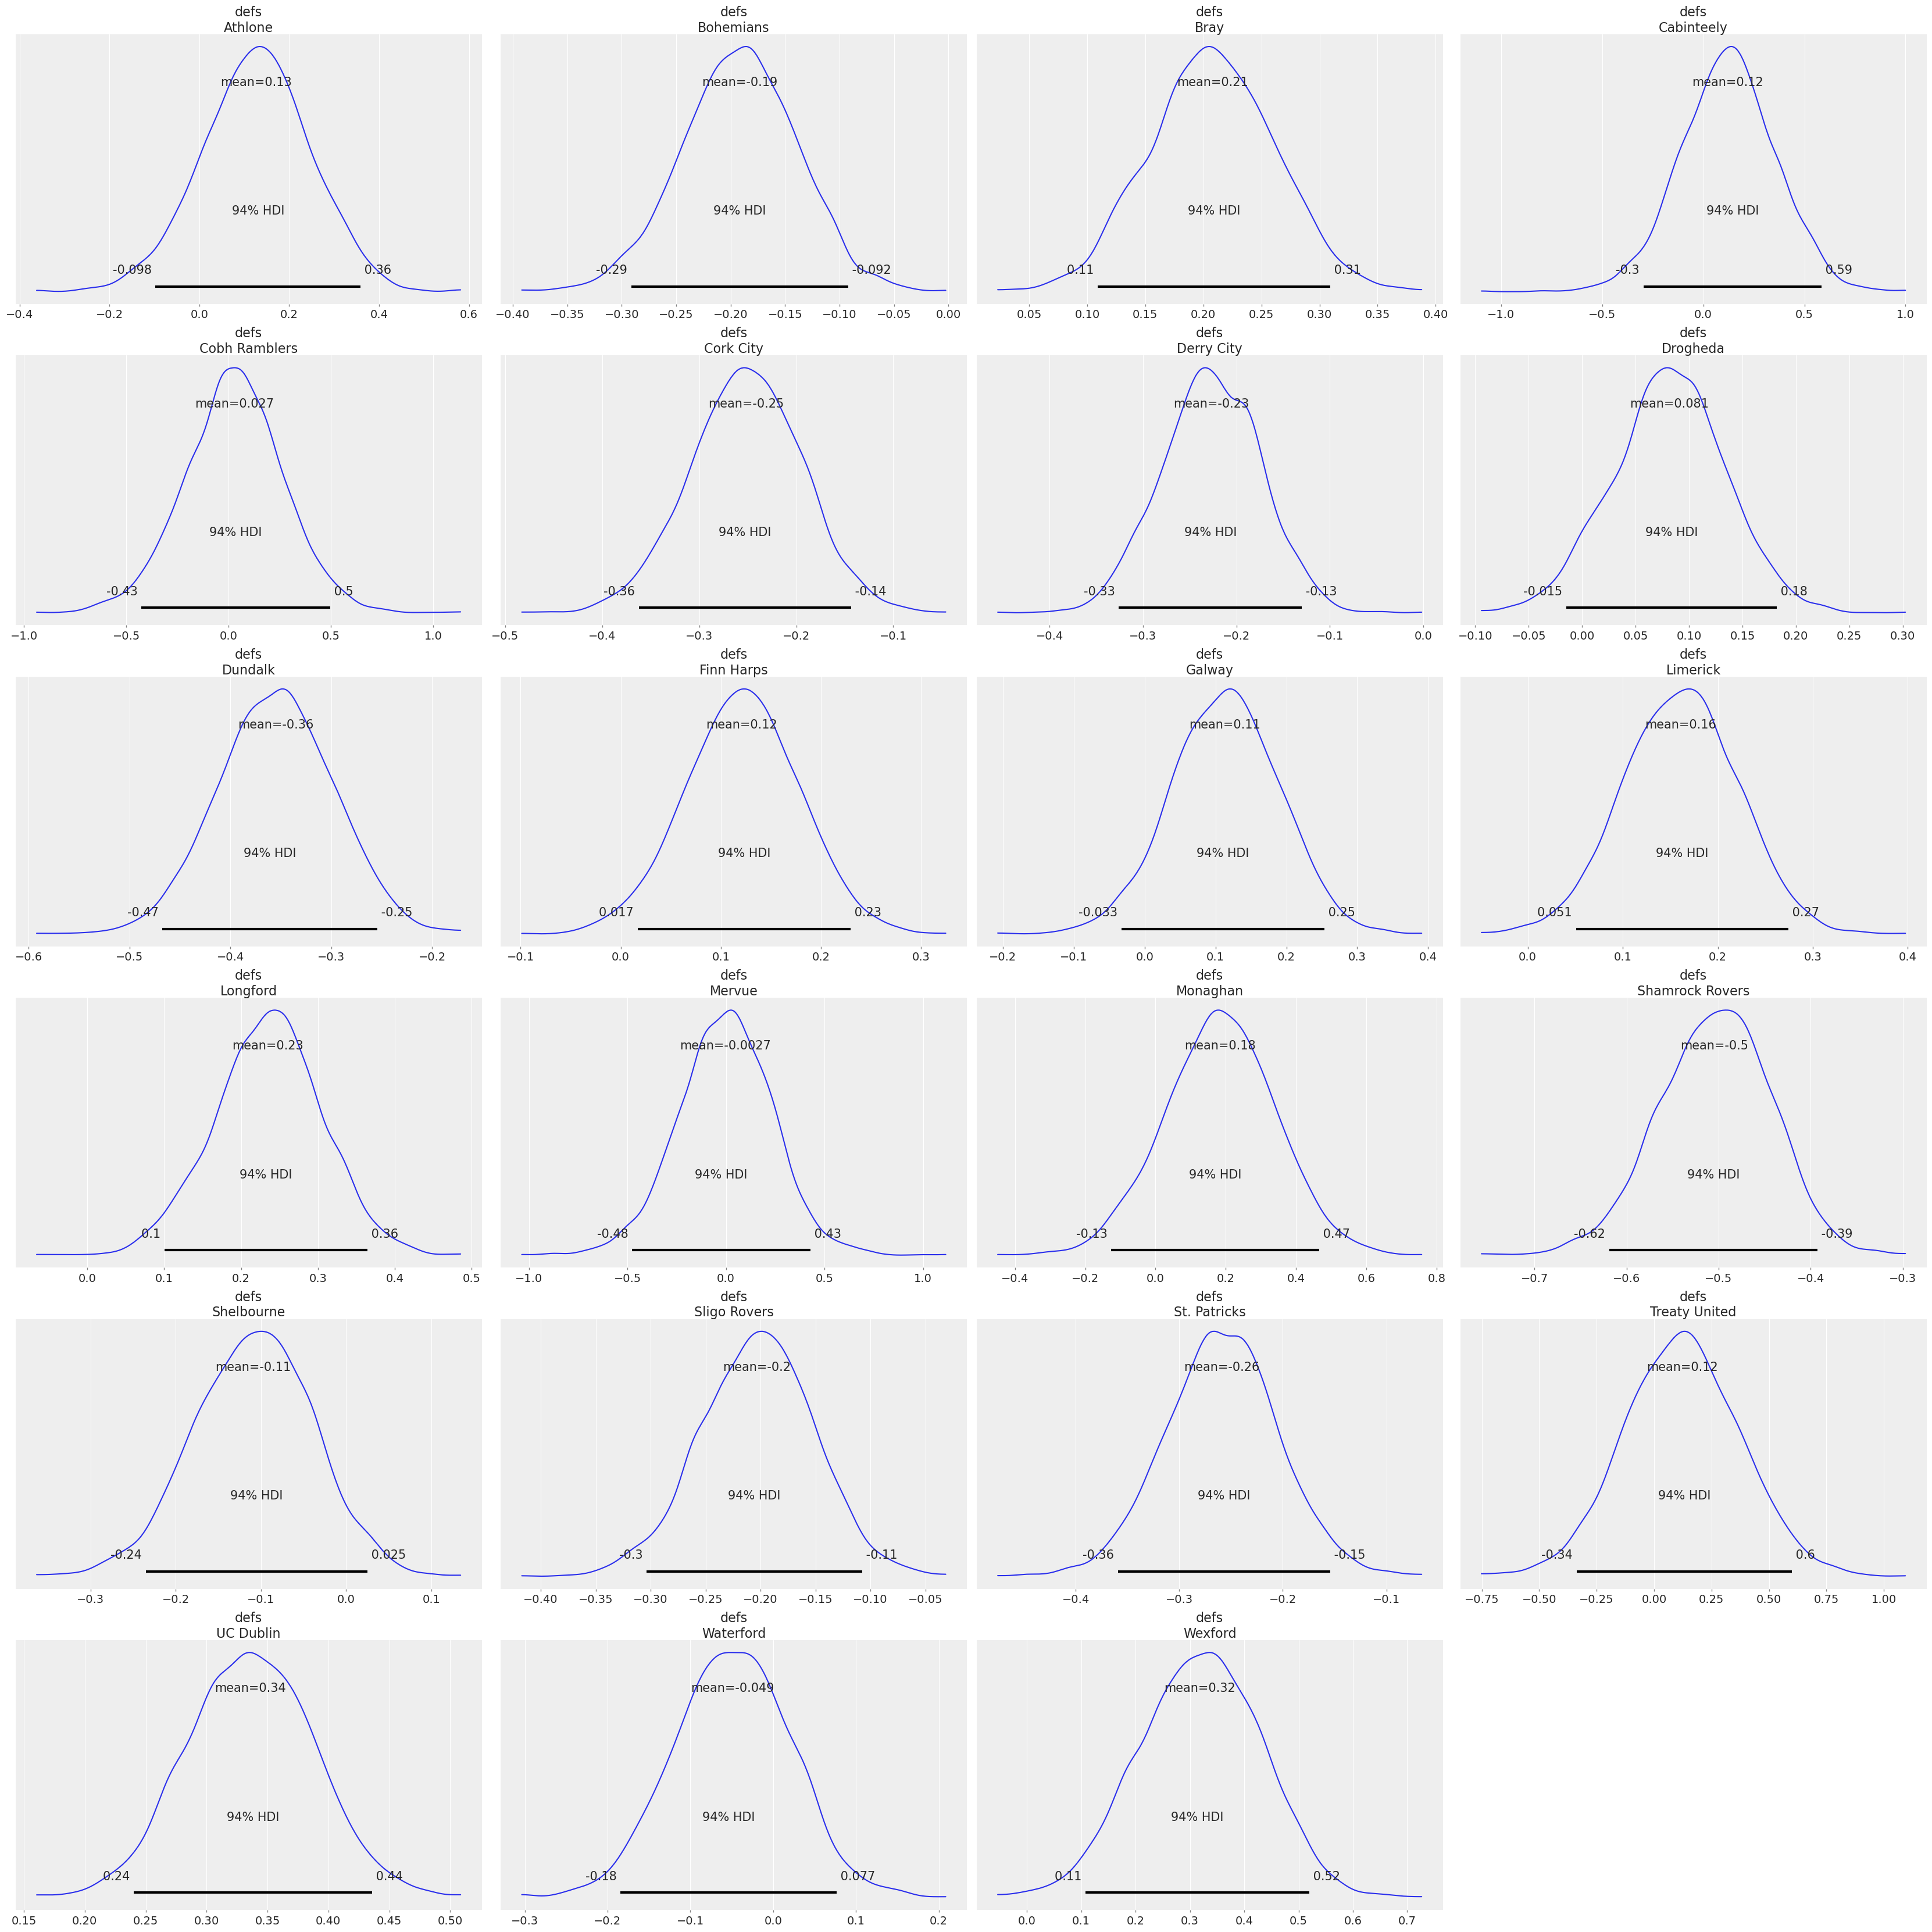

In [37]:
az.plot_posterior(trace, var_names=["defs"]);

In [38]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)
pp = trace.posterior_predictive
const = trace.constant_data
team_da = trace.posterior.team

Sampling: [away_points, home_points]


C:\Users\ciaran.ofoghlu\AppData\Local\miniconda3\envs\pymc-test\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [72]:
# fmt: off
pp["home_win"] = (
    (pp["home_points"] > pp["away_points"]) * 3     # home team wins and gets 3 points
    + (pp["home_points"] == pp["away_points"]) * 1  # tie -> home team gets 1 points
)
pp["away_win"] = (
    (pp["home_points"] < pp["away_points"]) * 3
    + (pp["home_points"] == pp["away_points"]) * 1
)
# fmt: on

In [73]:
groupby_sum_home = pp.home_win.groupby(team_da[const.home_team]).sum()
groupby_sum_away = pp.away_win.groupby(team_da[const.away_team]).sum()

pp["teamscores"] = groupby_sum_home + groupby_sum_away

In [74]:
from xarray_einstats.stats import rankdata

pp["rank"] = rankdata(-pp["teamscores"], dims="team", method="min")
pp[["rank"]].sel(team="Shamrock Rovers")

<xarray.Dataset> Size: 20kB
Dimensions:  (chain: 4, draw: 1000)
Coordinates:
  * chain    (chain) int32 16B 0 1 2 3
  * draw     (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
    team     <U15 60B 'Shamrock Rovers'
Data variables:
    rank     (chain, draw) int32 16kB 1 2 2 1 2 1 2 2 1 1 ... 1 1 1 2 1 1 1 2 2
Attributes:
    created_at:                 2024-08-19T21:15:27.138422+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2

In [75]:
import numpy as np
import pandas as pd

#bin_edges = np.arange(7) + 0.5
#data_sim = (
#    histogram(pp["rank"], dims=("chain", "draw"), bins=bin_edges, density=True)
#    .rename({"bin": "rank"})
#    .assign_coords(rank=np.arange(6) + 1)
#)

In [76]:
from xarray_einstats.numba import histogram

import numpy as np

# Define bin edges for 23 teams
bin_edges = np.arange(4) + 0.5  # Adjusted for 23 bins

# Generate the histogram and adjust ranks
data_sim = (
    histogram(pp["rank"], dims=("chain", "draw"), bins=bin_edges, density=True)
    .rename({"bin": "rank"})
    .assign_coords(rank=np.arange(3) + 1)  # Assign ranks from 1 to 23
)


In [77]:
idx_dim, col_dim = data_sim.dims
sim_table = pd.DataFrame(data_sim, index=data_sim[idx_dim], columns=data_sim[col_dim])


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

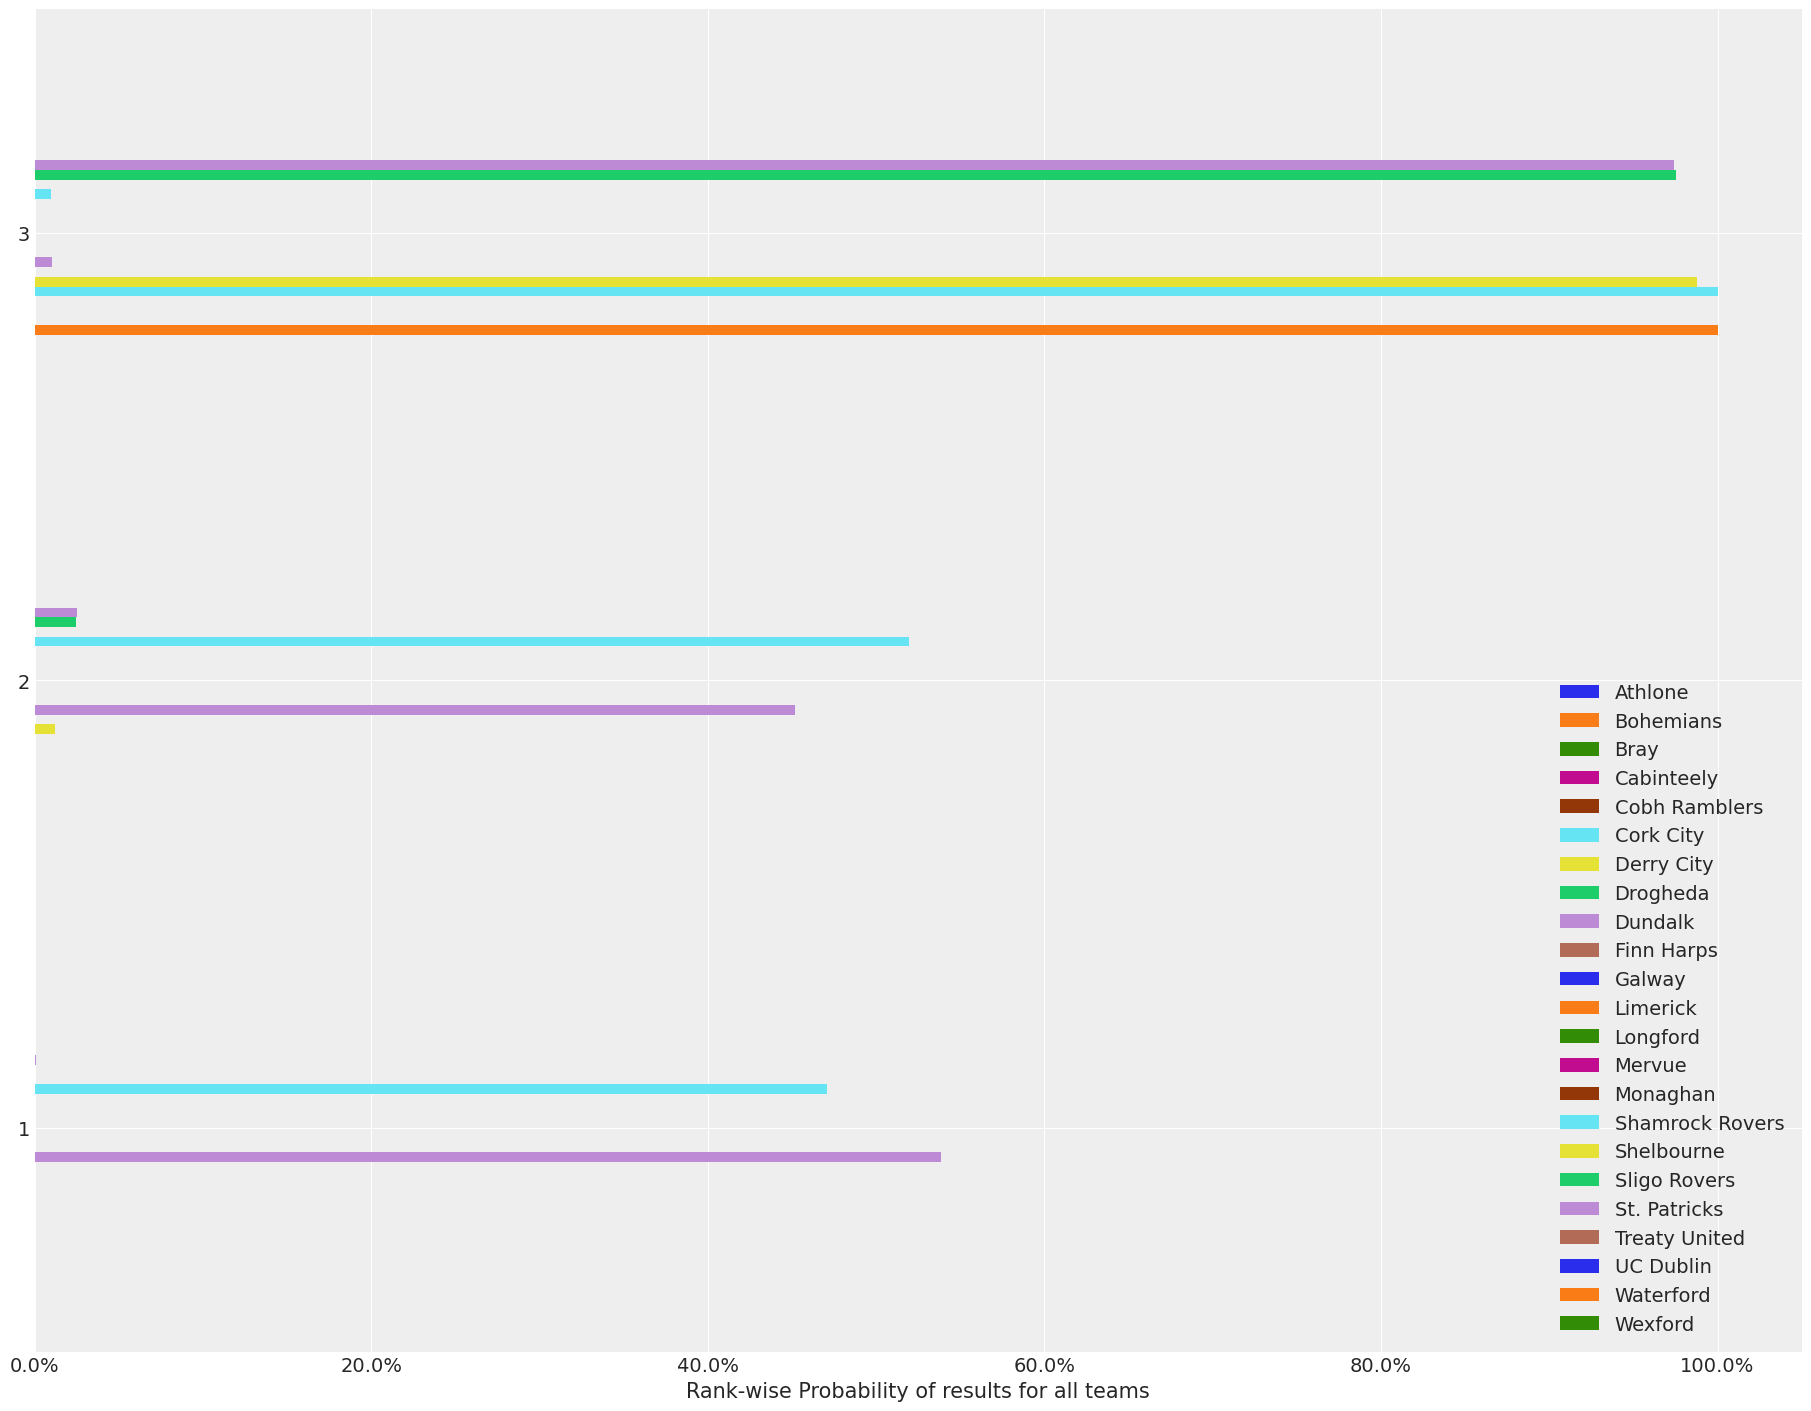

In [78]:
fig, ax = plt.subplots(figsize=(18, 14))
ax = sim_table.T.plot(kind="barh", ax=ax)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.1%}"))
ax.set_xlabel("Rank-wise Probability of results for all teams")
ax.set_yticklabels(np.arange(1, 3))
ax.set_ylabel("Ranks")
ax.invert_yaxis()
ax.legend(loc="best", fontsize="medium");